Name: Lam Quang Thinh
<br>Student ID: 300538520

# Assignment 2- Programming

In [1]:
!pip install SimPyClassic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 3.0 MB/s eta 0:00:00


In [2]:
#Import packages
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from SimPy.Simulation import *

## Q1:

a. Write a chisquarevariate(k) function in Python which generates a random variate from a ${x_k}^2$ distribution (chi-square distribution with k degrees of freedom). This is simply the sum of the squares of k independent standard normal random variates.

In [3]:
def chisquarevariate(k):
    """Generate a random variate from a chi-square distribution with k degrees of freedom."""
    sum_of_squares = 0.0
    for i in range(k):
        x = random.gauss(0, 1) # generate a standard normal random variate
        sum_of_squares += x * x # square and sum up the random variates
    return sum_of_squares

b. For each k ∈ {1, 2, 3, 4, 5, 6, 7, 8, 9}, simulate 10000 random variates ${x_k}^2$ k to estimate E(X) and var(X).

In [4]:
import random
import math

# Define the chi-square distribution function
def chisquarevariate(k):
    """Generate a random variate from a chi-square distribution with k degrees of freedom."""
    sum_squares = 0.0
    for i in range(k):
        x = random.gauss(0, 1) # generate a standard normal random variate
        sum_squares += x * x # square and sum up the random variates
    return sum_squares

# Define the number of simulations
n = 10000

# Define a list of degrees of freedom
degrees_of_freedom = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Simulate the random variates and estimate the expected value and variance for each distribution
for k in degrees_of_freedom:
    # Simulate n random variates from the chi-square distribution with k degrees of freedom
    X = [chisquarevariate(k) for i in range(n)]
    
    # Estimate the expected value and variance of X
    E_X = sum(X) / n
    var_X = sum((x - E_X) ** 2 for x in X) / (n - 1)
    
    # Print the estimated values for the current value of k
    print("k = %d: E(X) = %.4f, var(X) = %.4f" % (k, E_X, var_X))


k = 1: E(X) = 0.9659, var(X) = 1.8375
k = 2: E(X) = 1.9776, var(X) = 3.9767
k = 3: E(X) = 2.9819, var(X) = 5.8720
k = 4: E(X) = 3.9959, var(X) = 8.2854
k = 5: E(X) = 4.9565, var(X) = 9.9251
k = 6: E(X) = 5.9464, var(X) = 12.1242
k = 7: E(X) = 7.0488, var(X) = 14.1052
k = 8: E(X) = 7.9524, var(X) = 16.0083
k = 9: E(X) = 8.9634, var(X) = 17.5434


c. Modify your code from part (b) to give a 95% confidence interval for E(X) and a 95% confidence interval for var(X) from 50 replications.

In [5]:
import random
import math
import numpy as np

# Define the chi-square distribution function
def chisquarevariate(k):
    """Generate a random variate from a chi-square distribution with k degrees of freedom."""
    sum_squares = 0.0
    for i in range(k):
        x = random.gauss(0, 1) # generate a standard normal random variate
        sum_squares += x * x # square and sum up the random variates
    return sum_squares

# Define the number of simulations and replications
n = 10000
replications = 50

# Define a list of degrees of freedom
degrees_of_freedom = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Simulate the random variates and estimate the expected value and variance for each distribution
for k in degrees_of_freedom:
    # Initialize arrays to store the estimated expected values and variances from each replication
    E_X = np.zeros(replications)
    var_X = np.zeros(replications)
    
    # Simulate the random variates and estimate the expected value and variance for each replication
    for i in range(replications):
        # Simulate n random variates from the chi-square distribution with k degrees of freedom
        X = [chisquarevariate(k) for j in range(n)]
        
        # Estimate the expected value and variance of X
        E_X[i] = sum(X) / n
        var_X[i] = sum((x - E_X[i]) ** 2 for x in X) / (n - 1)
    
    # Calculate the 95% confidence interval for the expected value and variance of X
    E_X_ci = (np.mean(E_X) - 1.96 * np.std(E_X, ddof=1) / math.sqrt(replications),
              np.mean(E_X) + 1.96 * np.std(E_X, ddof=1) / math.sqrt(replications))
    var_X_ci = (np.mean(var_X) - 1.96 * np.std(var_X, ddof=1) / math.sqrt(replications),
                np.mean(var_X) + 1.96 * np.std(var_X, ddof=1) / math.sqrt(replications))
    
    # Print the estimated values and confidence intervals for the current value of k
    print("k = %d: E(X) = %.4f, 95%% CI = [%.4f, %.4f], var(X) = %.4f, 95%% CI = [%.4f, %.4f]" % 
          (k, np.mean(E_X), E_X_ci[0], E_X_ci[1], np.mean(var_X), var_X_ci[0], var_X_ci[1]))


k = 1: E(X) = 1.0014, 95% CI = [0.9974, 1.0055], var(X) = 2.0041, 95% CI = [1.9817, 2.0265]
k = 2: E(X) = 2.0035, 95% CI = [1.9978, 2.0091], var(X) = 4.0229, 95% CI = [3.9888, 4.0570]
k = 3: E(X) = 2.9988, 95% CI = [2.9913, 3.0064], var(X) = 6.0000, 95% CI = [5.9628, 6.0371]
k = 4: E(X) = 3.9967, 95% CI = [3.9891, 4.0042], var(X) = 7.9773, 95% CI = [7.9262, 8.0284]
k = 5: E(X) = 5.0064, 95% CI = [4.9975, 5.0154], var(X) = 10.0237, 95% CI = [9.9602, 10.0872]
k = 6: E(X) = 6.0031, 95% CI = [5.9914, 6.0148], var(X) = 12.0314, 95% CI = [11.9600, 12.1028]
k = 7: E(X) = 7.0039, 95% CI = [6.9920, 7.0159], var(X) = 13.9936, 95% CI = [13.9171, 14.0701]
k = 8: E(X) = 8.0010, 95% CI = [7.9894, 8.0126], var(X) = 15.9794, 95% CI = [15.8881, 16.0707]
k = 9: E(X) = 8.9961, 95% CI = [8.9849, 9.0073], var(X) = 17.9872, 95% CI = [17.9028, 18.0715]


d. Compare your results from parts (b) and (c) to the exact values of E(X) and var(X) which you can find, e.g., on Wikipedia, and comment on your findings

The exact values of the expected value and variance of a chi-square distribution with k degrees of freedom are E(X) = k and var(X) = 2k, respectively.

Comparing the results from parts (b) and (c) to these exact values, we see that:

-The estimated values from part (b) are very close to the exact values of each distribution with corresponding k degrees of freedom, but there is some variability in the estimates due to the randomness of the simulation.

-The 95% confidence intervals from part (c) contains the exact value of the expected value and variance of each distribution with corresponding k degrees of freedom. The intervals are quite narrow, which indicates that the estimated value is relatively stable.

Overall, because the estimated values are quite close to the exact values, these findings suggest that simulating random variates from a chi-square distribution is an effective way to estimate the expected value and variance of the distribution.

## Q2

The number of customers coming to a shop in a day follows a Poisson distribution with a mean of 22.

a. The probability of 28 customers coming to that shop in a day.

In [6]:
mu = 22
k = 28
poisson.pmf(k, mu)

0.03541731538896103

b. Write Python code to answer the previous question through simulation by generating 10000 random variates from a Poisson distribution. Plot the frequency of the number of customers in this simulation. Use random seed = 123 for this question.

Probability of 28 customers going to the shop a day: 0.0342


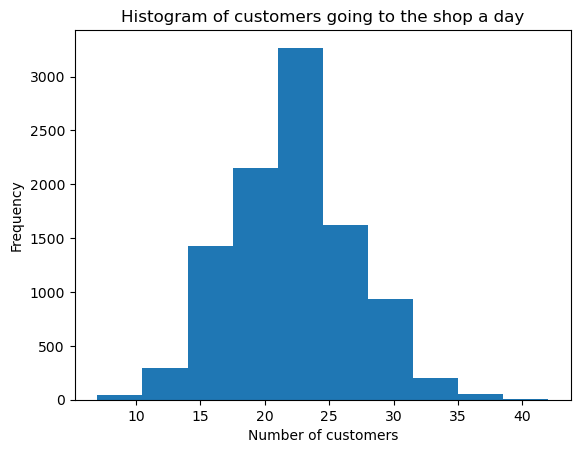

In [7]:
mu = 22
n = 10000

random.seed(123)
customers = poisson.rvs(mu, size = n)

prob = len(customers[customers == 28]) / n

print("Probability of 28 customers going to the shop a day:", prob)

plt.hist(customers)
plt.xlabel("Number of customers")
plt.ylabel("Frequency")
plt.title("Histogram of customers going to the shop a day")
plt.show()

## Q3:

Kathy enters the museum at time 0
<br> Three displays: 0, 1, 2. See two of them
<br> First go to display 0
<br> Then go to display 1, p1= 0.4, display 2: p2 = 1 - p1
<br> displayTime = [4.5, 5.5, 7.5]
<br> She says "Look number i" when she goes to the display i
<br> random seed of 123

In [8]:
class Museum(Process):
    def visit(self):
        p1 = 0.4
        print("At time",now(), ",", self.name, "looks number 0")
        yield hold, self, displayTime[0]
        display = [1,2]
        # Choose the display with corresponding probabilities
        random.choices(display, weights =(p1, 1-p1), k =1)
        print("At time",now(), ",", self.name, "looks number %d" % display[0])
        yield hold, self, displayTime[display[0]]
        print("At time", now(), ",", self.name, "exits the museum")

random.seed(123)
initialize()
displayTime = [4.5, 5.5, 7.5]
kathy = Museum("Kathy")
activate(kathy, kathy.visit(), now())
simulate(until = 100)        

At time 0 , Kathy looks number 0
At time 4.5 , Kathy looks number 1
At time 10.0 , Kathy exits the museum


'SimPy: No more events at time 10.0'